<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Conv1D, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 42s 42ms/step - loss: 0.6363 - accuracy: 0.5900 - val_loss: 0.3163 - val_accuracy: 0.8664
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2778 - accuracy: 0.8895 - val_loss: 0.3150 - val_accuracy: 0.8673
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2086 - accuracy: 0.9215 - val_loss: 0.3032 - val_accuracy: 0.8792
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1774 - accuracy: 0.9353 - val_loss: 0.3120 - val_accuracy: 0.8782
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1440 - accuracy: 0.9480 - val_loss: 0.3630 - val_accuracy: 0.8691
Epoch 6/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1150 - accuracy: 0.9609 - val_loss: 0.3806 - val_accuracy: 0.8802
Epoch 7/100
176/176 [==============================] - 6s 36ms/step - loss: 0.0828 - accuracy: 0.9739 - val_loss: 0.39

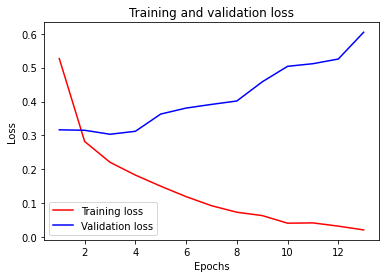

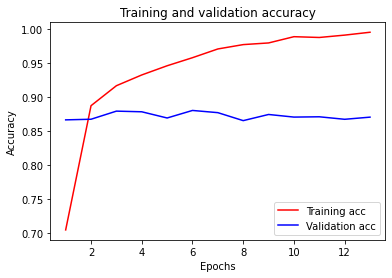

              precision    recall  f1-score   support

           0      0.919     0.831     0.873     12500
           1      0.846     0.927     0.885     12500

    accuracy                          0.879     25000
   macro avg      0.883     0.879     0.879     25000
weighted avg      0.883     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6007 - accuracy: 0.6387 - val_loss: 0.3511 - val_accuracy: 0.8510
Epoch 2/100
176/176 [==============================] - 6s 35ms/step - loss: 0.2657 - accuracy: 0.8970 - val_loss: 0.2777 - val_accuracy: 0.8834
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1961 - accuracy: 0.9297 - val_loss: 0.2883 - val_accuracy: 0.8838
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1656 - accuracy: 0.9427 - val_loss: 0.3037 - val_accuracy: 0.8848
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

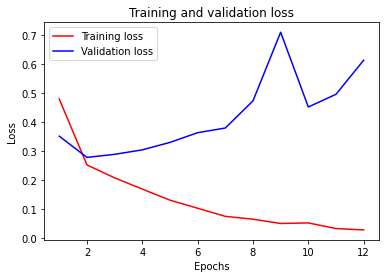

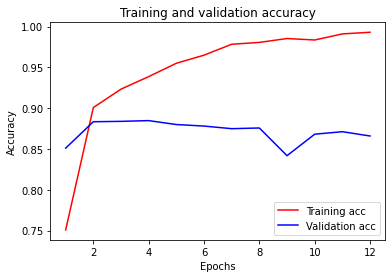

              precision    recall  f1-score   support

           0      0.896     0.867     0.881     12500
           1      0.871     0.900     0.885     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6254 - accuracy: 0.6187 - val_loss: 0.3651 - val_accuracy: 0.8385
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2972 - accuracy: 0.8810 - val_loss: 0.3206 - val_accuracy: 0.8637
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2212 - accuracy: 0.9175 - val_loss: 0.3127 - val_accuracy: 0.8700
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1868 - accuracy: 0.9306 - val_loss: 0.3172 - val_accuracy: 0.8758
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

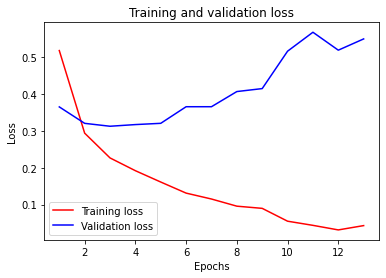

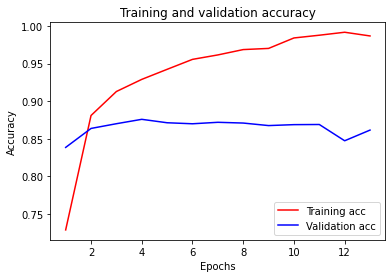

              precision    recall  f1-score   support

           0      0.894     0.839     0.866     12500
           1      0.849     0.901     0.874     12500

    accuracy                          0.870     25000
   macro avg      0.871     0.870     0.870     25000
weighted avg      0.871     0.870     0.870     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6011 - accuracy: 0.6332 - val_loss: 0.3297 - val_accuracy: 0.8656
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2686 - accuracy: 0.8920 - val_loss: 0.4287 - val_accuracy: 0.7962
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2699 - accuracy: 0.8903 - val_loss: 0.2879 - val_accuracy: 0.8804
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1675 - accuracy: 0.9384 - val_loss: 0.3092 - val_accuracy: 0.8824
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

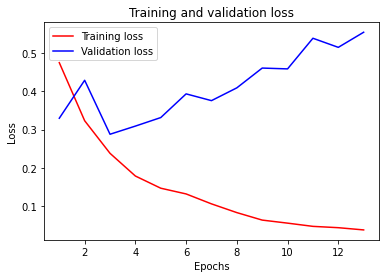

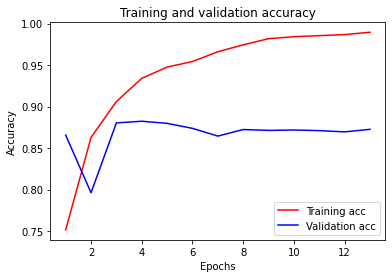

              precision    recall  f1-score   support

           0      0.882     0.878     0.880     12500
           1      0.879     0.883     0.881     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6184 - accuracy: 0.6064 - val_loss: 0.3395 - val_accuracy: 0.8640
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2496 - accuracy: 0.9038 - val_loss: 0.2953 - val_accuracy: 0.8788
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1949 - accuracy: 0.9286 - val_loss: 0.3177 - val_accuracy: 0.8716
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1578 - accuracy: 0.9444 - val_loss: 0.3370 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

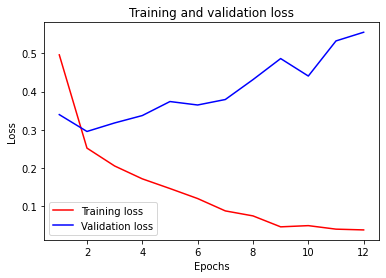

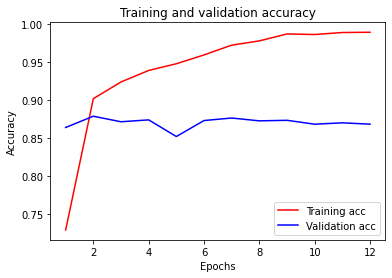

              precision    recall  f1-score   support

           0      0.867     0.895     0.881     12500
           1      0.892     0.862     0.877     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 8s 40ms/step - loss: 0.6259 - accuracy: 0.5997 - val_loss: 0.3451 - val_accuracy: 0.8540
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2697 - accuracy: 0.8975 - val_loss: 0.3188 - val_accuracy: 0.8645
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2092 - accuracy: 0.9233 - val_loss: 0.2932 - val_accuracy: 0.8796
Epoch 4/100
176/176 [==============================] - 7s 37ms/step - loss: 0.1641 - accuracy: 0.9431 - val_loss: 0.3123 - val_accuracy: 0.8789
Epoch 5/100
176/176 [==============================] - 7s 37ms/step - loss: 0.1

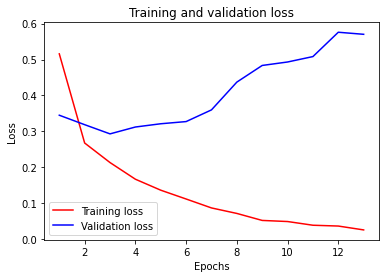

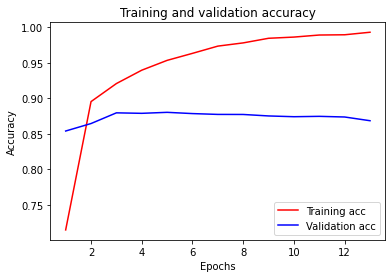

              precision    recall  f1-score   support

           0      0.866     0.899     0.882     12500
           1      0.895     0.860     0.877     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 9s 40ms/step - loss: 0.6327 - accuracy: 0.6122 - val_loss: 0.3172 - val_accuracy: 0.8649
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2659 - accuracy: 0.8944 - val_loss: 0.2935 - val_accuracy: 0.8810
Epoch 3/100
176/176 [==============================] - 7s 37ms/step - loss: 0.2067 - accuracy: 0.9224 - val_loss: 0.2837 - val_accuracy: 0.8870
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1578 - accuracy: 0.9437 - val_loss: 0.3044 - val_accuracy: 0.8828
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

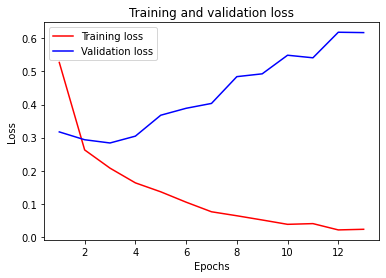

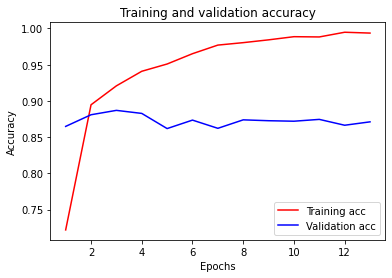

              precision    recall  f1-score   support

           0      0.880     0.896     0.888     12500
           1      0.894     0.878     0.886     12500

    accuracy                          0.887     25000
   macro avg      0.887     0.887     0.887     25000
weighted avg      0.887     0.887     0.887     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6138 - accuracy: 0.6050 - val_loss: 0.3547 - val_accuracy: 0.8470
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2745 - accuracy: 0.8896 - val_loss: 0.3009 - val_accuracy: 0.8747
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1934 - accuracy: 0.9304 - val_loss: 0.2863 - val_accuracy: 0.8853
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1562 - accuracy: 0.9430 - val_loss: 0.3325 - val_accuracy: 0.8728
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

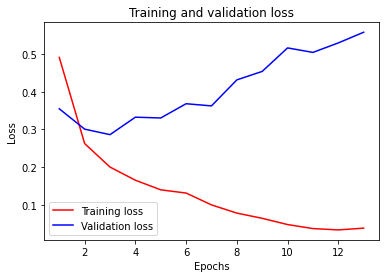

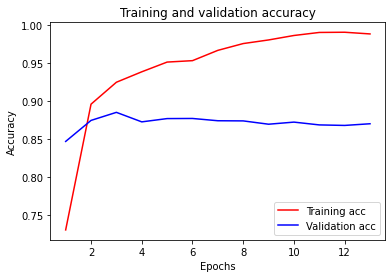

              precision    recall  f1-score   support

           0      0.884     0.888     0.886     12500
           1      0.887     0.883     0.885     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6472 - accuracy: 0.5855 - val_loss: 0.3232 - val_accuracy: 0.8618
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2711 - accuracy: 0.8896 - val_loss: 0.3165 - val_accuracy: 0.8678
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2510 - accuracy: 0.9051 - val_loss: 0.3114 - val_accuracy: 0.8718
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1763 - accuracy: 0.9364 - val_loss: 0.2996 - val_accuracy: 0.8809
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

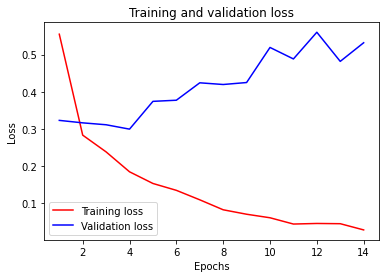

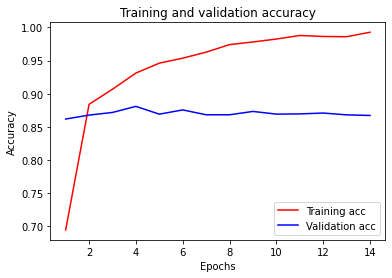

              precision    recall  f1-score   support

           0      0.892     0.866     0.879     12500
           1      0.870     0.896     0.883     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 8s 40ms/step - loss: 0.6411 - accuracy: 0.5949 - val_loss: 0.3127 - val_accuracy: 0.8694
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2861 - accuracy: 0.8877 - val_loss: 0.2814 - val_accuracy: 0.8813
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2109 - accuracy: 0.9189 - val_loss: 0.3577 - val_accuracy: 0.8390
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1833 - accuracy: 0.9298 - val_loss: 0.3016 - val_accuracy: 0.8777
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.

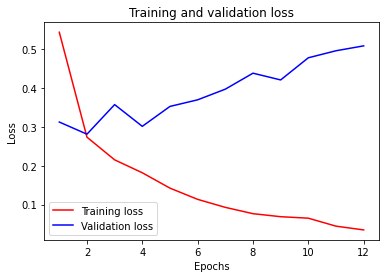

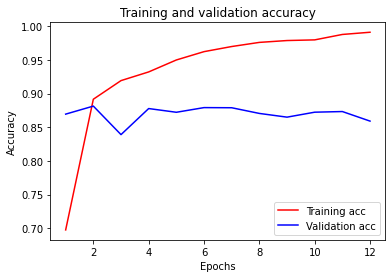

              precision    recall  f1-score   support

           0      0.902     0.855     0.878     12500
           1      0.862     0.907     0.884     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


Average accuracy: 0.8844 (+/- 0.0083)
Average loss: 0.2828 (+/- 0.0128)
Average F1: 0.8816 (+/- 0.0041)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
